In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import MinMaxScaler
from scipy.cluster.hierarchy import linkage
import scipy.cluster.hierarchy as sch

In [2]:
data=pd.read_csv("crime_data.csv")
data.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [3]:
data1=data.drop(['Unnamed: 0'],axis=1)
data1.head()

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6


In [4]:
norm=MinMaxScaler()
df=norm.fit_transform(data1)
df

array([[0.74698795, 0.65410959, 0.44067797, 0.35917313],
       [0.55421687, 0.74657534, 0.27118644, 0.96124031],
       [0.43975904, 0.85273973, 0.81355932, 0.6124031 ],
       [0.48192771, 0.49657534, 0.30508475, 0.31524548],
       [0.4939759 , 0.79109589, 1.        , 0.86046512],
       [0.42771084, 0.54452055, 0.77966102, 0.81136951],
       [0.15060241, 0.22260274, 0.76271186, 0.09819121],
       [0.30722892, 0.6609589 , 0.6779661 , 0.21963824],
       [0.87951807, 0.99315068, 0.81355932, 0.63565891],
       [1.        , 0.56849315, 0.47457627, 0.47803618],
       [0.27108434, 0.00342466, 0.86440678, 0.33333333],
       [0.10843373, 0.25684932, 0.37288136, 0.17829457],
       [0.57831325, 0.69863014, 0.86440678, 0.43152455],
       [0.38554217, 0.23287671, 0.55932203, 0.35400517],
       [0.08433735, 0.03767123, 0.42372881, 0.10335917],
       [0.31325301, 0.23972603, 0.57627119, 0.27648579],
       [0.53614458, 0.21917808, 0.33898305, 0.23255814],
       [0.87951807, 0.69863014,

In [5]:
df1=pd.DataFrame(df)
df1.head()

,0,1,2,3
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465


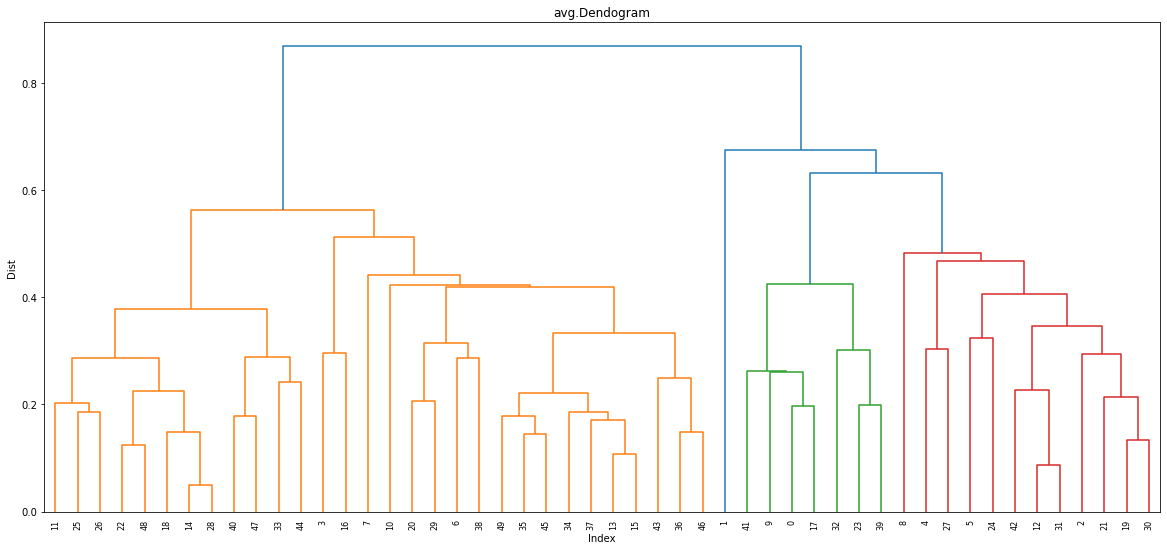

In [7]:
x=linkage(df1,method='average',metric='euclidean')
plt.figure(figsize=(20,9))
plt.title('avg.Dendogram')
plt.xlabel('Index')
plt.ylabel('Dist')
sch.dendrogram(x)
plt.show()

In [10]:
y=AgglomerativeClustering(n_clusters=4,linkage='average',affinity='euclidean').fit(df1)
y.labels_
labels=pd.DataFrame(y.labels_)
data1['clust']=labels
data1.head()

,Murder,Assault,UrbanPop,Rape,clust
0,13.2,236,58,21.2,3
1,10.0,263,48,44.5,2
2,8.1,294,80,31.0,1
3,8.8,190,50,19.5,0
4,9.0,276,91,40.6,1


In [11]:
data1.groupby(data1.clust).mean()

,Murder,Assault,UrbanPop,Rape
clust,,,,
0,4.870000,114.433333,63.633333,15.943333
1,10.883333,256.916667,78.333333,32.250000
2,10.000000,263.000000,48.000000,44.500000
3,14.671429,251.285714,54.285714,21.685714


In [12]:
data1.clust.value_counts()

0    30
1    12
3     7
2     1
Name: clust, dtype: int64

In [ ]:
#kmeans

In [15]:
from sklearn.cluster import KMeans

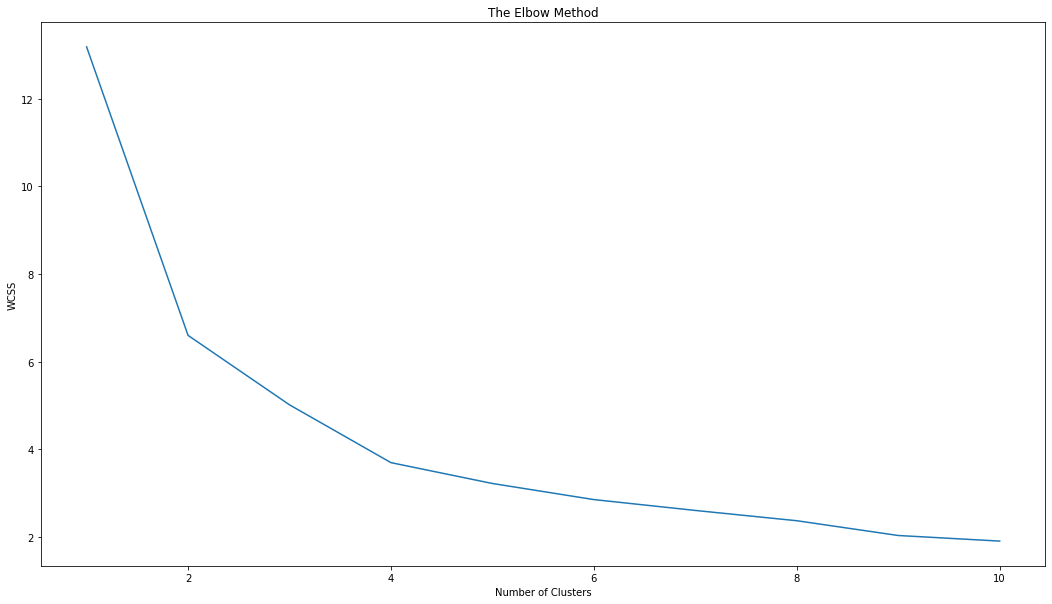

In [17]:
plt.figure(figsize=(18,10))
WCSS=[]
for i in range (1,11):
    clf= KMeans(n_clusters=i)
    clf.fit(df1)
    WCSS.append(clf.inertia_) 
plt.plot(range(1, 11), WCSS)
plt.title('The Elbow Method')
plt.ylabel('WCSS')
plt.xlabel('Number of Clusters')
plt.show() 

In [18]:
k=KMeans(n_clusters=4)
pred_k=k.fit_predict(df1)
pred_k

array([1, 2, 2, 1, 2, 2, 3, 3, 2, 1, 3, 0, 2, 3, 0, 3, 0, 1, 0, 2, 3, 2,
       0, 1, 2, 0, 0, 2, 0, 3, 2, 2, 1, 0, 3, 3, 3, 3, 3, 1, 0, 1, 2, 3,
       0, 3, 3, 0, 0, 3], dtype=int32)

In [19]:
k.cluster_centers_

array([[0.1686747 , 0.11485774, 0.34028683, 0.12601868],
       [0.79141566, 0.6802226 , 0.36864407, 0.36466408],
       [0.60333642, 0.72734457, 0.74576271, 0.66905188],
       [0.29254518, 0.32148973, 0.70974576, 0.29667313]])

In [20]:
k.inertia_

3.690820410392111

In [21]:
g=pd.DataFrame(pred_k)
g.head()

,0
0,1
1,2
2,2
3,1
4,2


In [22]:
data2=data.iloc[:,1:]
data2.head()

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6


In [23]:
data2['clust']=g
data2.head()

,Murder,Assault,UrbanPop,Rape,clust
0,13.2,236,58,21.2,1
1,10.0,263,48,44.5,2
2,8.1,294,80,31.0,2
3,8.8,190,50,19.5,1
4,9.0,276,91,40.6,2


In [24]:
data2.groupby(data2.clust).mean()

,Murder,Assault,UrbanPop,Rape
clust,,,,
0,3.600000,78.538462,52.076923,12.176923
1,13.937500,243.625000,53.750000,21.412500
2,10.815385,257.384615,76.000000,33.192308
3,5.656250,138.875000,73.875000,18.781250


In [25]:
data2.clust.value_counts()

3    16
2    13
0    13
1     8
Name: clust, dtype: int64

In [26]:
data3=data.rename({'Unnamed: 0':'State'},axis=1)
data3.head()

,State,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [27]:
data_k=data3.copy()
data_k.head()

,State,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [28]:
data_k['clusters']=g 
data_k.head()

,State,Murder,Assault,UrbanPop,Rape,clusters
0,Alabama,13.2,236,58,21.2,1
1,Alaska,10.0,263,48,44.5,2
2,Arizona,8.1,294,80,31.0,2
3,Arkansas,8.8,190,50,19.5,1
4,California,9.0,276,91,40.6,2


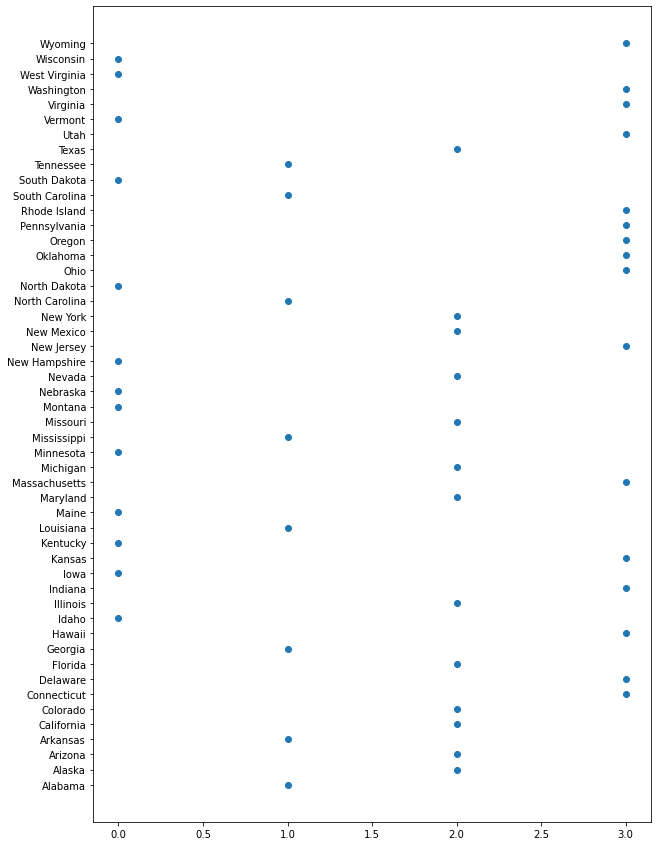

In [29]:
plt.figure(figsize=(10, 15))  
plt.scatter(data_k['clusters'],data_k['State'],) 

In [ ]:
#DBscan

In [30]:
new=data3.iloc[:,1:]
new.head()

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6


In [31]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import scipy

In [32]:
db=StandardScaler().fit(new)
std=db.transform(new)
std

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

In [37]:
dbs=DBSCAN(eps=.8,min_samples=5)
dbs.fit(std)

DBSCAN(eps=0.8)

In [38]:
dbs.labels_

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0, -1,  0,  1,  0, -1,
       -1,  1, -1, -1, -1,  0, -1, -1,  0,  0, -1,  1, -1, -1, -1, -1,  1,
        0,  0, -1,  0, -1, -1,  1, -1, -1, -1, -1,  0, -1, -1,  1,  0])

In [39]:
new['clust']=dbs.labels_
new.head()

,Murder,Assault,UrbanPop,Rape,clust
0,13.2,236,58,21.2,-1
1,10.0,263,48,44.5,-1
2,8.1,294,80,31.0,-1
3,8.8,190,50,19.5,-1
4,9.0,276,91,40.6,-1


In [40]:
new.clust.value_counts()

-1    33
 0    11
 1     6
Name: clust, dtype: int64

In [41]:
new.head()

,Murder,Assault,UrbanPop,Rape,clust
0,13.2,236,58,21.2,-1
1,10.0,263,48,44.5,-1
2,8.1,294,80,31.0,-1
3,8.8,190,50,19.5,-1
4,9.0,276,91,40.6,-1


In [42]:
data_d=pd.concat([data3,new['clust']],axis=1)
data_d.head()

,State,Murder,Assault,UrbanPop,Rape,clust
0,Alabama,13.2,236,58,21.2,-1
1,Alaska,10.0,263,48,44.5,-1
2,Arizona,8.1,294,80,31.0,-1
3,Arkansas,8.8,190,50,19.5,-1
4,California,9.0,276,91,40.6,-1


In [43]:
data_d.insert(loc=0, column='State_Num', value=np.arange(len(df1)))
data_d.head()

,State_Num,State,Murder,Assault,UrbanPop,Rape,clust
0,0,Alabama,13.2,236,58,21.2,-1
1,1,Alaska,10.0,263,48,44.5,-1
2,2,Arizona,8.1,294,80,31.0,-1
3,3,Arkansas,8.8,190,50,19.5,-1
4,4,California,9.0,276,91,40.6,-1


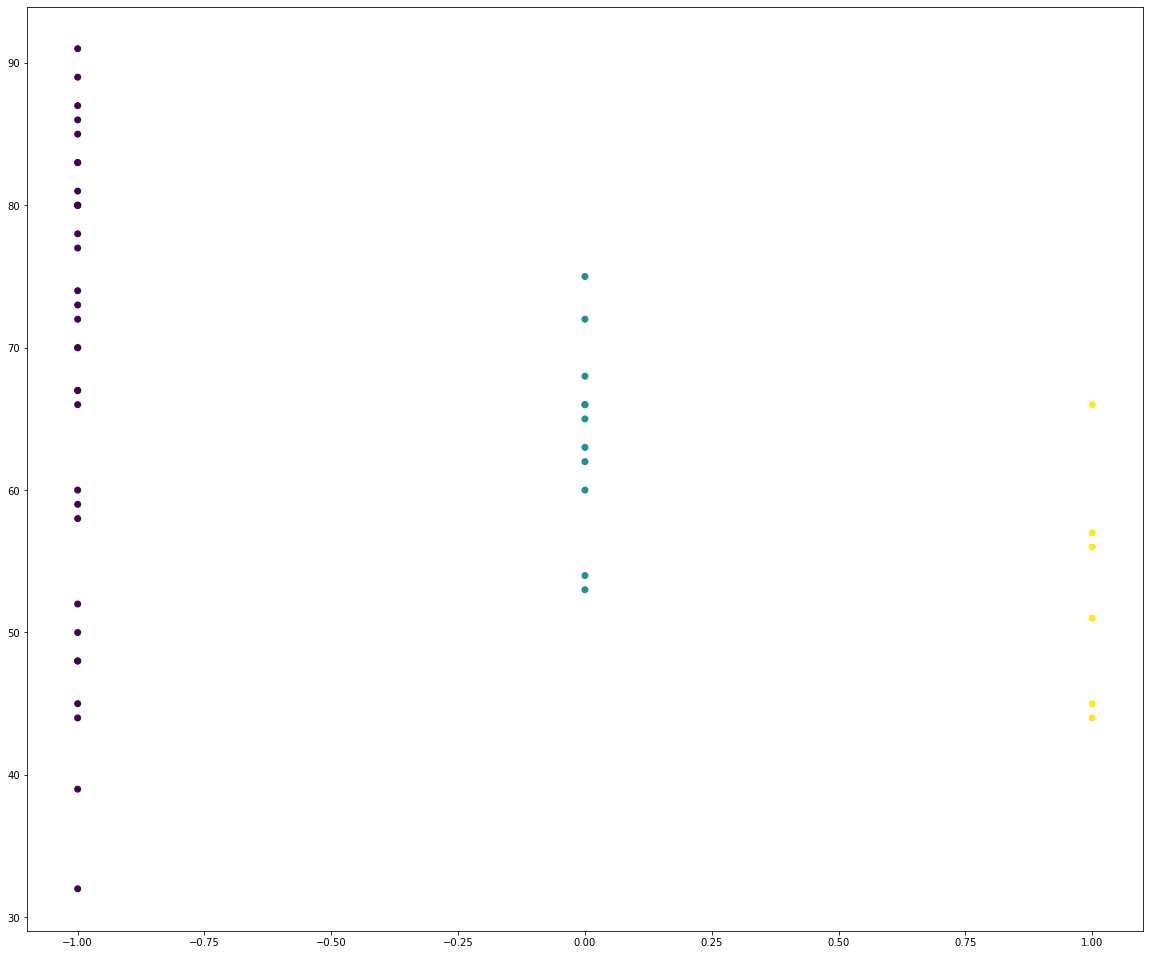

In [44]:
plt.figure(figsize=(20, 17))  
plt.scatter(data_d['clust'],data_d['UrbanPop'], c=dbs.labels_) 